<a href="https://colab.research.google.com/github/maroqijalil/ai-au-nb/blob/main/AOI_VGG16_Model_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>AUAI Exercise 1: Introduction to AIdea AOI </h1></td>
    </tr>
  </tbody>
</table>

# (A) AIdea dataset

## Step 1: Load the AIdea AOI dataset from google drive

In [1]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1tovCO2gsjesjJ8OsfHgahyt-buY34dk0',dest_path='./content', unzip=True)

## Step 2: check the train/test datasets

In [2]:
#train dataset
import pandas as pd
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(2528, 2)


In [3]:
type(df_train)

pandas.core.frame.DataFrame

In [4]:
df_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [5]:
#test dataset
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test.head()

(10142, 2)


,ID,Label
0,test_00000.png,NaN
1,test_00001.png,NaN
2,test_00002.png,NaN
3,test_00003.png,NaN
4,test_00004.png,NaN


## Step 3: Build the lists of training images and labels from the dataframe

In [6]:
#limit the amount of training images for the class process
#train_num = 480
train_num = df_train.shape[0]
if train_num >= df_train.shape[0]:
  train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values
print(train_labels[:10])

[0 1 1 5 5 5 3 0 3 5]


## Step 4: read images of the training set

In [7]:
train_path ="train_images/"
train_images = []
from tensorflow.keras.preprocessing import image
for file in train_files:
    img = image.load_img(train_path+file, color_mode="rgb", target_size = (224, 224))
    train_images.append(img)
    if len(train_images)%100 == 0:
      print('.', end='')
print(len(train_images))

.........................2528


## Step 5: show AOI images of the classes: 
0 (normal), 1 (void), 2 (horizontal  defect) 3 (vertical defect), 4 (edge defect), 5 (particle)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

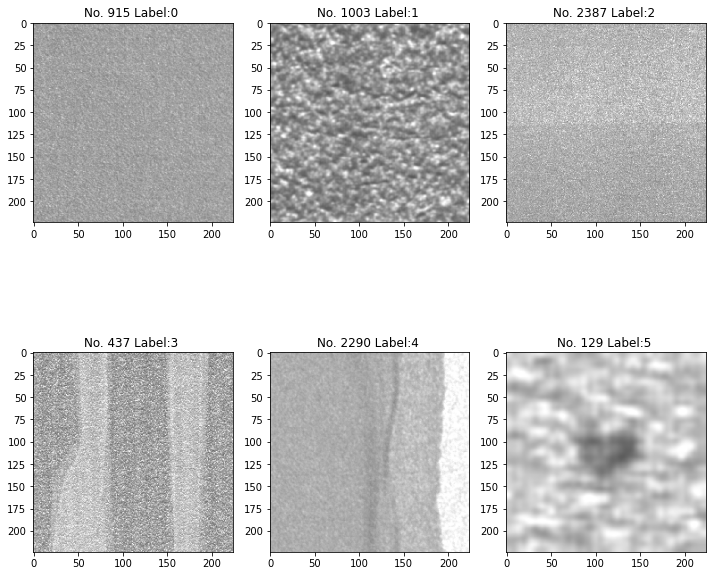

In [9]:
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        curclass += 1
        curclass %= 6
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

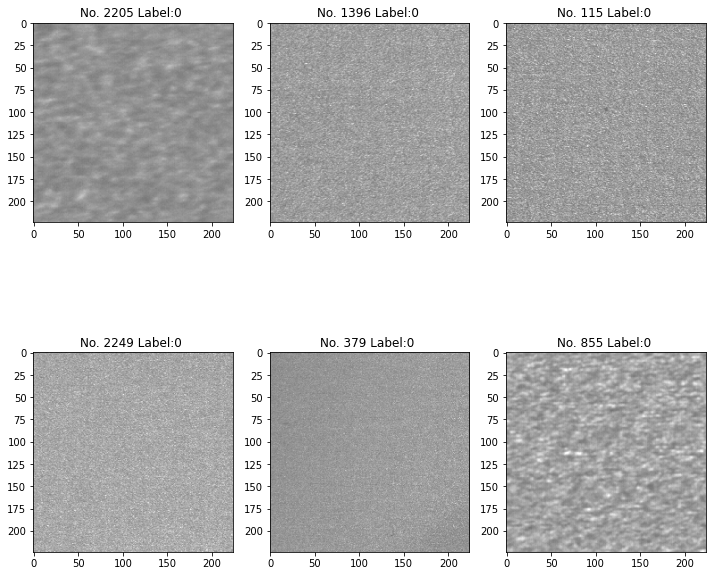

In [10]:
# Class 0-normal
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

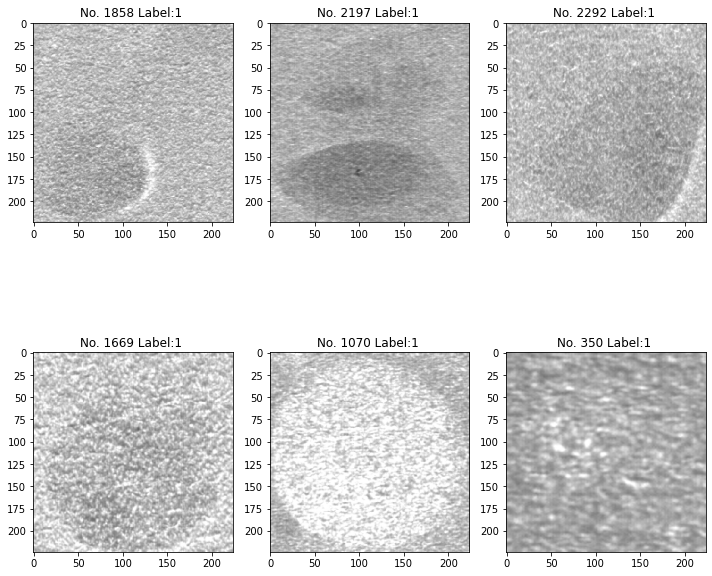

In [11]:
# Class 1-void
import random
curclass = 1
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

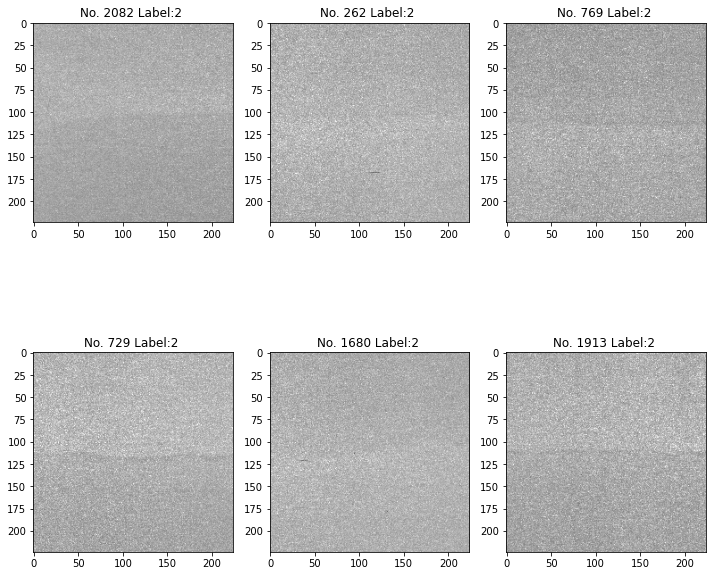

In [12]:
# Class 2-horizontal defect
import random
curclass = 2
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

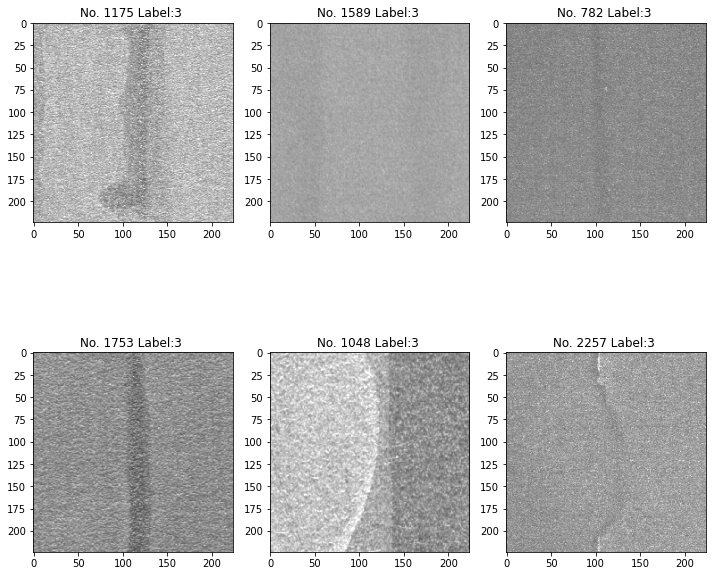

In [13]:
# Class 3-vertical defect
import random
curclass = 3
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

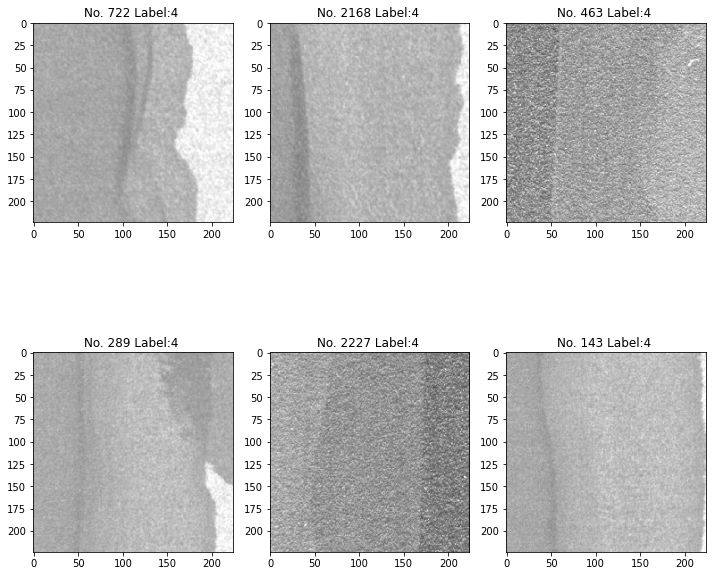

In [14]:
# Class 4-edge defect
import random
curclass = 4
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

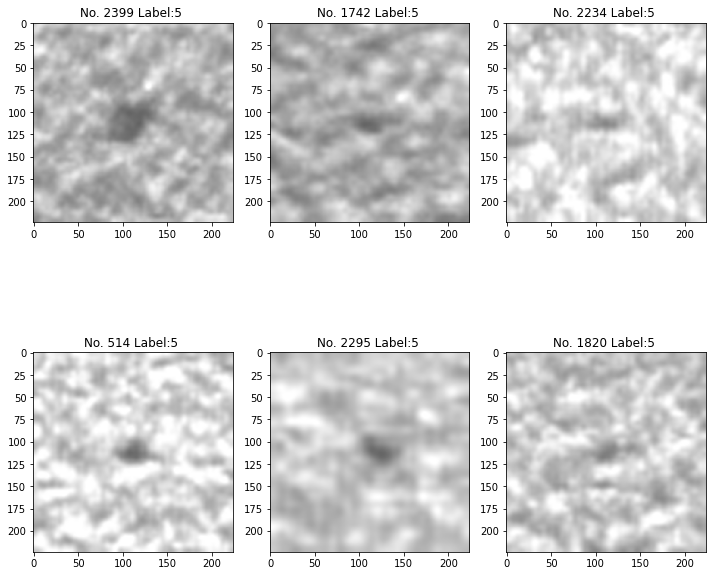

In [15]:
# Class 5-particle
import random
curclass = 5
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

## Step 6: Show statistics of training images in the 6 classes

In [16]:
import numpy as np
labels, counts = np.unique(train_labels, return_counts=True)
print(labels, counts)

[0 1 2 3 4 5] [674 492 100 378 240 644]


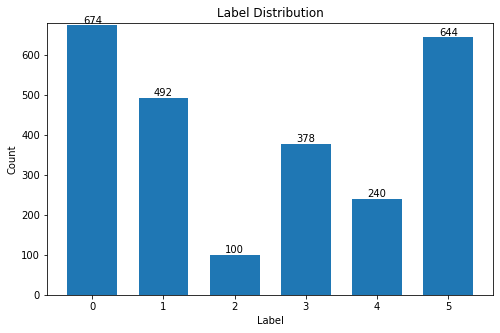

In [17]:
fig = plt.figure(figsize=(8, 5))
plt.bar(labels, counts, width=0.7, align='center')
plt.title("Label Distribution")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.ylim(0, 680)

for a, b in zip(labels, counts):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
plt.show()

# AOI02-Training a Deep Learning Model by Transfer Learning

## Step 7: convert images into input vectors

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#Assign a list for storing image data
img_list=[]
for i in range(train_num):
    x=image.img_to_array(train_images[i])
    x = preprocess_input(x)
    img_list.append(x)
X_train = np.array(img_list)

In [19]:
print (X_train.shape)

(2528, 224, 224, 3)


## Step 8: Configure a customized VGG-16 Deep Learning Model

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [21]:
num_classes = 6
#input shape
input_layer = Input(shape=(224, 224, 3))

#Use the VGG16 model 
model = VGG16(input_tensor=input_layer, include_top=True,weights='imagenet')

#Summary of the customize VGG16 model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(input_layer, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Step 9: Compile and train the model

In [23]:
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [24]:
from tensorflow.python.keras import utils
# one-hot encoding
y_train = utils.np_utils.to_categorical(train_labels, num_classes)

In [25]:
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
79/79 [==============================] - 13s 117ms/step - loss: 0.8799 - accuracy: 0.7034
Epoch 2/5
79/79 [==============================] - 9s 118ms/step - loss: 0.2532 - accuracy: 0.8994
Epoch 3/5
79/79 [==============================] - 9s 119ms/step - loss: 0.1924 - accuracy: 0.9260
Epoch 4/5
79/79 [==============================] - 9s 120ms/step - loss: 0.1785 - accuracy: 0.9305
Epoch 5/5
79/79 [==============================] - 10s 121ms/step - loss: 0.1635 - accuracy: 0.9383


## Step 10: Analyze training results


In [26]:
y_predicts = custom_vgg_model.predict(X_train)
y_predictss = y_predicts

In [27]:
print(y_predicts.shape)

(2528, 6)


In [28]:
import numpy as np
predicts = np.argmax(y_predicts,axis=1)
print(predicts[0:10])

[2 1 1 5 5 5 3 0 3 5]


In [29]:
# ASSIGNMENT 4 (start form this until end of this code section)
print(predicts.shape)
print(train_labels.shape)
print(train_files.shape)
train_labelss = train_labels
train_filess = train_files

(2528,)
(2528,)
(2528,)


In [30]:
y_probs = y_predicts.max(axis=1)
print(y_probs.shape)
y_probs_max_index = np.where(y_probs==y_probs[y_probs<0.9].max())[0]
print(y_probs_max_index)
y_probs[y_probs_max_index]

(2528,)
[612]


array([0.8993757], dtype=float32)

In [31]:
df_data = {'ID': train_files, 'Label': train_labels, 'Pred_Label': predicts, 'Prob': y_probs}
df_results = pd.DataFrame(df_data)
df_results.head()

,ID,Label,Pred_Label,Prob
0,train_00000.png,0,2,0.845533
1,train_00001.png,1,1,0.964118
2,train_00002.png,1,1,0.999941
3,train_00003.png,5,5,1.000000
4,train_00004.png,5,5,0.999917


In [32]:
# check the result
print(y_probs[y_probs_max_index])
df_results.loc[y_probs_max_index]

[0.8993757]


,ID,Label,Pred_Label,Prob
612,train_00612.png,0,0,0.899376


In [33]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(train_labels, predicts)
print(confusion)

[[624  28  22   0   0   0]
 [ 14 477   0   0   0   1]
 [  8   0  92   0   0   0]
 [ 25  22   0 331   0   0]
 [  0   3   0   1 236   0]
 [  0   0   0   0   0 644]]


In [34]:
overkill= []
underkill = []
for i in range(train_num):
  if train_labels[i] == 0 and predicts[i] !=0:
    overkill.append(i)
  if train_labels[i] != 0 and predicts[i] ==0:
    underkill.append(i)
print('# of overkill= {}; # of underkill= {} '.format(len(overkill), len(underkill)))

# of overkill= 50; # of underkill= 47 


## Step 11: clean memory usage

In [35]:
del X_train
del img_list
del train_images


In [36]:
import gc
gc.collect()

712

# AOI03-Inference by our Deep Learning Model

## Step 12: Build the lists of test images and labels from the dataframe

In [37]:
test_files  = df_test.iloc[:,0].values
test_labels = df_test.iloc[:,1].values
print(test_labels[:10])

[nan nan nan nan nan nan nan nan nan nan]


## Step 13: Read test images

In [38]:
#limit the amount of test images for the class process
#test_num = len(test_files)
test_num = 1024
print(test_num)

1024


In [39]:
test_path ="test_images/"
test_images = []
from tensorflow.keras.preprocessing import image
for file in test_files[0:test_num]:
    img = image.load_img(test_path+file, color_mode="rgb", target_size = (224, 224))
    test_images.append(img)
    if len(test_images)%100 == 0:
      print('.', end='')
print('Finish')

..........Finish


## Step 14: convert images into input vectors

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#Assign a list for storing image data
img_list=[]
for i in range(test_num):
    x=image.img_to_array(test_images[i])
    x = preprocess_input(x)
    img_list.append(x)
X_test = np.array(img_list)

## Step 15: Predict the test images

In [41]:
y_predicts = custom_vgg_model.predict(X_test, batch_size=10)
predict = np.argmax(y_predicts,axis=1)
print(predict)

[1 2 5 ... 5 0 5]


In [42]:
import pandas as pd
df_out = pd.DataFrame(predict) 
df_out.to_csv("ans.csv", index=False)

In [43]:
# ASSIGNMENT 4
y_probs = y_predictss.max(axis=1)
print(y_probs.shape)
y_probs_max_index = np.where(y_probs==y_probs[y_probs<0.9].max())[0]
df_data = {'ID': train_filess, 'Label': train_labelss, 'Pred_Label': predicts, 'Prob': y_probs}
df_results = pd.DataFrame(df_data)
df_results.head()
print(y_probs_max_index)
# check the result
print(y_probs[y_probs_max_index])
df_results.loc[y_probs_max_index]

(2528,)
[612]
[0.8993757]


,ID,Label,Pred_Label,Prob
612,train_00612.png,0,0,0.899376
